In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import pandas as pd

In [30]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df=pd.read_csv(boston_url)
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


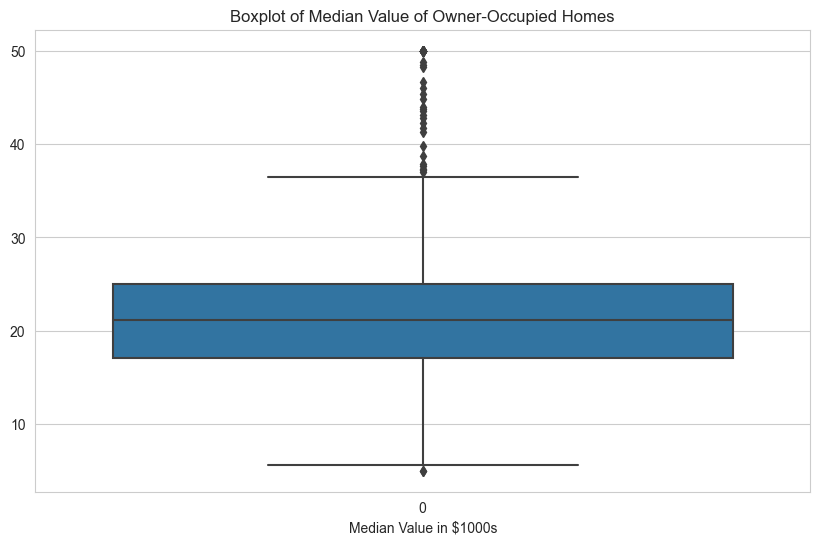

In [31]:
#For the "Median value of owner-occupied homes" provide a boxplot
# Set the style for the visualizations
sns.set_style("whitegrid")

# Generate a boxplot for the "Median value of owner-occupied homes"
plt.figure(figsize=(10, 6))
sns.boxplot(df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.xlabel('Median Value in $1000s')
plt.show()


#The boxplot shows the median value of owner-occupied homes is around 21,000 dollars.
#The minimum value is around 5,000 dollars and the maximum value is around 45,000 dollars.
#The median value is around 21,000 dollars.
#The first quartile is around 17,000 dollars.
#The third quartile is around 25,000 dollars.

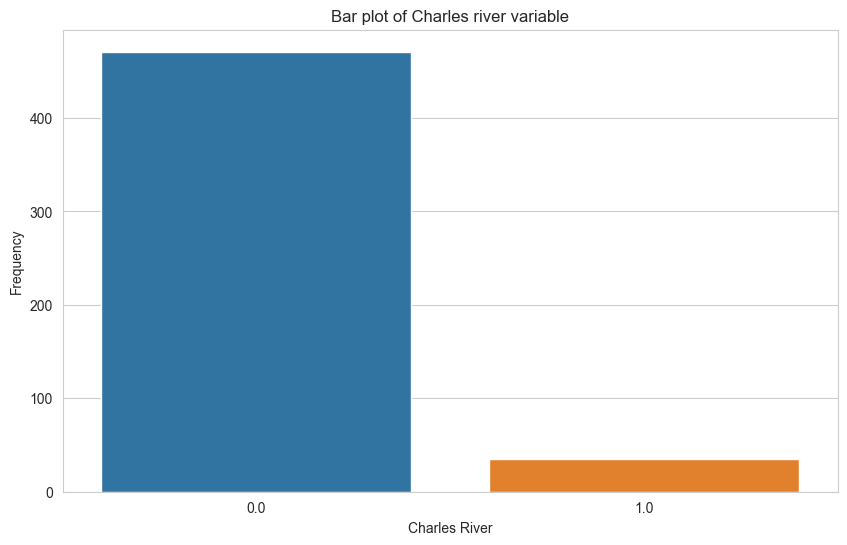

In [32]:
#Provide a  bar plot for the Charles river variable
plt.figure(figsize=(10, 6))
sns.countplot(x='CHAS', data=df)
plt.title('Bar plot of Charles river variable')
plt.xlabel('Charles River')
plt.ylabel('Frequency')
plt.show()

#The bar plot shows the frequency of the two classes of the variable CHAS.
# The two classes are "0", which represents houses that are not adjacent to the Charles River,
# and "1", which represents houses that are adjacent to the Charles River.
# As shown in the plot, there are many houses that are not adjacent to the Charles River (class 0)
# and few houses that are adjacent to the Charles River (class 1).

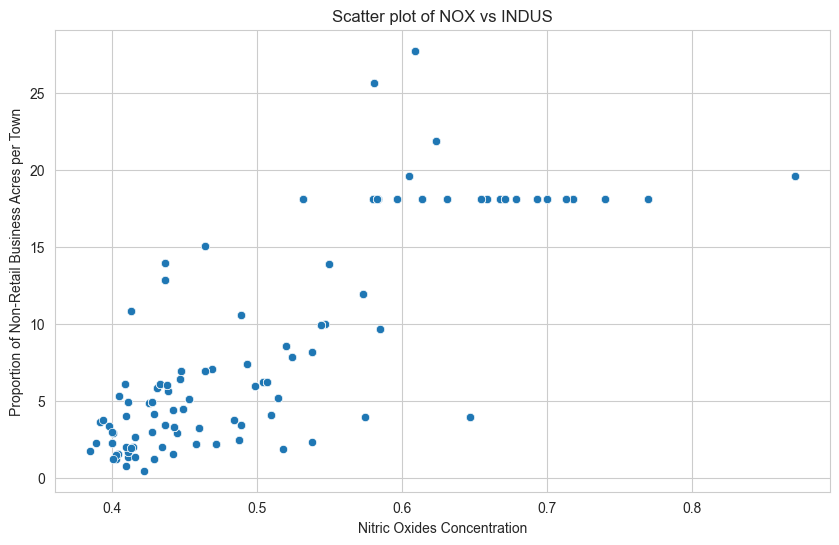

In [33]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NOX', y='INDUS', data=df)
plt.title('Scatter plot of NOX vs INDUS')
plt.xlabel('Nitric Oxides Concentration')
plt.ylabel('Proportion of Non-Retail Business Acres per Town')
plt.show()

#The scatter plot shows that as the Nitric Oxides Concentration increases,
# the Proportion of Non-Retail Business Acres per Town also increases.
# Therefore, there is a positive relationship between Nitric Oxides Concentration and
# Proportion of Non-Retail Business Acres per Town.



/var/folders/y5/1jwj62851wd0vzgt6b_jkbgh0000gn/T/ipykernel_5639/3092527677.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PTRATIO'], bins=30)


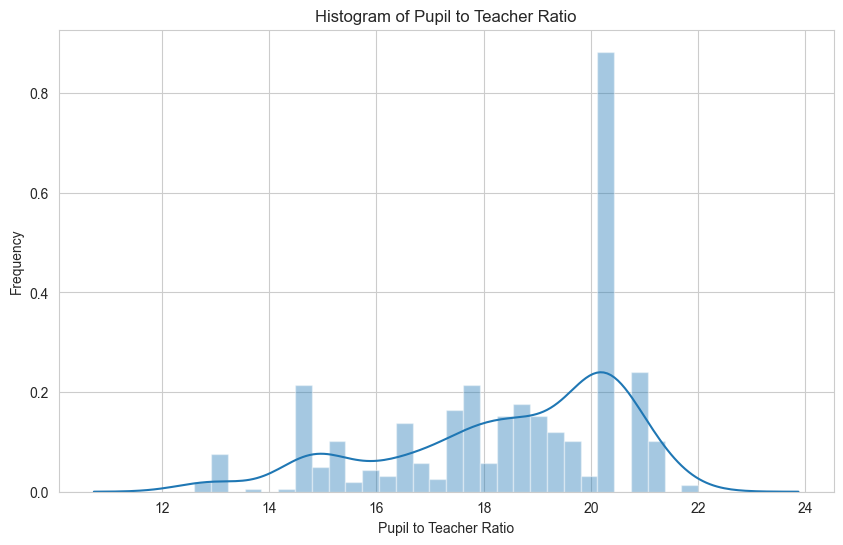

In [34]:
# Create a histogram for the pupil to teacher ratio variable
plt.figure(figsize=(10, 6))
sns.distplot(df['PTRATIO'], bins=30)
plt.title('Histogram of Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

#The histogram shows the frequency of the pupil to teacher ratio.
# The pupil to teacher ratio variable is skewed to the left.
# The majority of the values of the pupil to teacher ratio are over 20.
# The values range from around 12.5 to around 22.5.
# The histogram is not normal.



In [35]:
# Initialize variables for significance level and conclusions
alpha = 0.05
conclusions = {}

# 1. T-test for independent samples to check if there is a significant difference in median value of houses bounded by the Charles river or not
# Null Hypothesis: There is no significant difference in median value of houses bounded by the Charles river or not.
# Alternative Hypothesis: There is a significant difference in median value of houses bounded by the Charles river or not.

t_stat, p_val = stats.ttest_ind(df[df['CHAS'] == 1]['MEDV'], df[df['CHAS'] == 0]['MEDV'])
conclusions['T-test'] = 'Reject Null Hypothesis' if p_val < alpha else 'Fail to Reject Null Hypothesis'

print(t_stat, p_val)
print('T-test:', conclusions['T-test'])


3.996437466090509 7.390623170519902e-05
T-test: Reject Null Hypothesis


Conclusion: Based on the test results, you would reject the null hypothesis. This suggests that there is a statistically significant difference in the median value of houses that are bounded by the Charles River compared to those that are not.

In simple terms, the median value of the houses seems to be affected by whether or not they are near the Charles River.


In [36]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
# Null Hypothesis: There is no difference in Median values of houses for each proportion of owner occupied units built prior to 1940.
# Alternative Hypothesis: There is a difference in Median values of houses for each proportion of owner occupied units built prior to 1940.

results = stats.f_oneway(df[df['AGE'] < 25]['MEDV'],
                            df[(df['AGE'] >= 25) & (df['AGE'] < 50)]['MEDV'],
                            df[(df['AGE'] >= 50) & (df['AGE'] < 75)]['MEDV'],
                            df[df['AGE'] >= 75]['MEDV'])

conclusions['ANOVA'] = 'Reject Null Hypothesis' if results[1] < alpha else 'Fail to Reject Null Hypothesis'

print(results)
print('ANOVA:', conclusions['ANOVA'])


F_onewayResult(statistic=25.4866772097812, pvalue=2.3178855286954125e-15)
ANOVA: Reject Null Hypothesis


Conclusion: Based on the test results, you should reject the null hypothesis. This suggests that there is a statistically significant difference in the median value of houses depending on the age of the owner-occupied units built before 1940. In other words, the age of these units does appear to have an effect on the median value of the houses.


In [37]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
# Null Hypothesis: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
# Alternative Hypothesis: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

cor, p_val = stats.pearsonr(df['NOX'], df['INDUS'])
conclusions['Pearson Correlation'] = 'Reject Null Hypothesis' if p_val < alpha else 'Fail to Reject Null Hypothesis'

print(cor, p_val)
print('Pearson Correlation:', conclusions['Pearson Correlation'])


0.7636514469209157 7.913361061236247e-98
Pearson Correlation: Reject Null Hypothesis


Conclusion: The test results show that the null hypothesis should be rejected, indicating that there is a statistically significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. The correlation coefficient of approximately 0.764 suggests a strong positive relationship, meaning as one variable increases, the other is likely to also increase.

In [39]:

# 4. Regression analysis to check the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes
# Null Hypothesis: The additional weighted distance to the five Boston employment centres has no impact on the median value of owner-occupied homes.
# Alternative Hypothesis: The additional weighted distance to the five Boston employment centres has an impact on the median value of owner-occupied homes.

X = df['DIS'].values.reshape(-1, 1)
y = df['MEDV'].values.reshape(-1, 1)
regression_model = stats.linregress(X.flatten(), y.flatten())
slope = regression_model.slope
p_val = regression_model.pvalue
conclusions['Regression'] = 'Reject Null Hypothesis' if p_val < alpha else 'Fail to Reject Null Hypothesis'

print(slope, p_val)
print('Regression:', conclusions['Regression'])

1.0916130158411095 1.2066117273371046e-08
Regression: Reject Null Hypothesis


Conclusion: According to the test results, the null hypothesis is rejected, indicating that the additional weighted distance to the five Boston employment centers does have a statistically significant impact on the median value of owner-occupied homes. The slope of 1.0916 suggests that for each unit increase in distance, the median value of homes increases by approximately 1.09 units.
